In [3]:
%reload_ext autoreload
%autoreload 2

from glob import glob

import mediapy
from moviepy.video.io.bindings import mplfig_to_npimage as fig_to_np

import numpy as np

from scipy import interpolate, spatial

from matplotlib import pylab as plt
from matplotlib import cm

from pytoshop.user import nested_layers
from pytoshop import enums
from pytoshop.image_data import ImageData

from jupyterthemes import jtplot

jtplot.style(theme='chesterish', context='talk',
             fscale=1.4, spines=False, grid=False)

import dataprep as DP
import psdio

from mysegmentation import get_segments


In [4]:
psd_path  = "../annotations/contaminants/raw/"
psd_paths = sorted(glob(psd_path+"*.psd"))

In [5]:
Layers = psdio.psd_layesrs_to_npy(psd_paths[-2])

  0%|          | 0/7 [00:00<?, ?it/s]

0 PixelLayer('Background' size=1608x1608)


 29%|██▊       | 2/7 [00:01<00:02,  2.05it/s]

1 Curves('Curves 1' mask)
2 ShapeLayer('bkg' size=1640x1633)


 43%|████▎     | 3/7 [00:02<00:02,  1.44it/s]

3 PixelLayer('conta' size=1591x1580)


 57%|█████▋    | 4/7 [00:02<00:01,  1.62it/s]

4 PixelLayer('cells' size=1608x1500)


 71%|███████▏  | 5/7 [00:03<00:01,  1.77it/s]

5 PixelLayer('cslls2' size=1608x1492)


 86%|████████▌ | 6/7 [00:03<00:00,  1.88it/s]

6 PixelLayer('cells3' size=1516x903)


100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


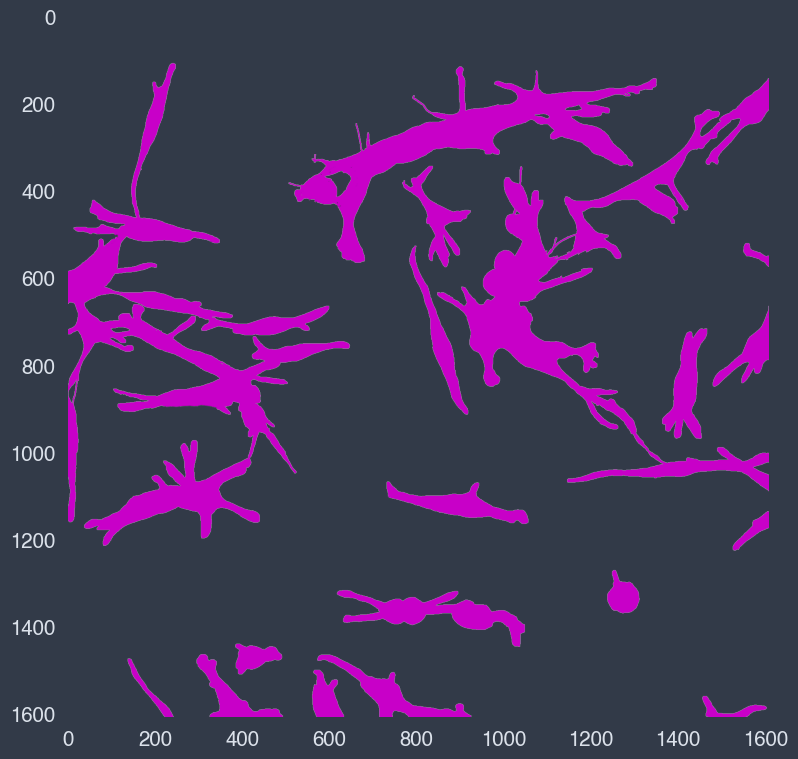

In [6]:
plt.imshow(Layers[4])

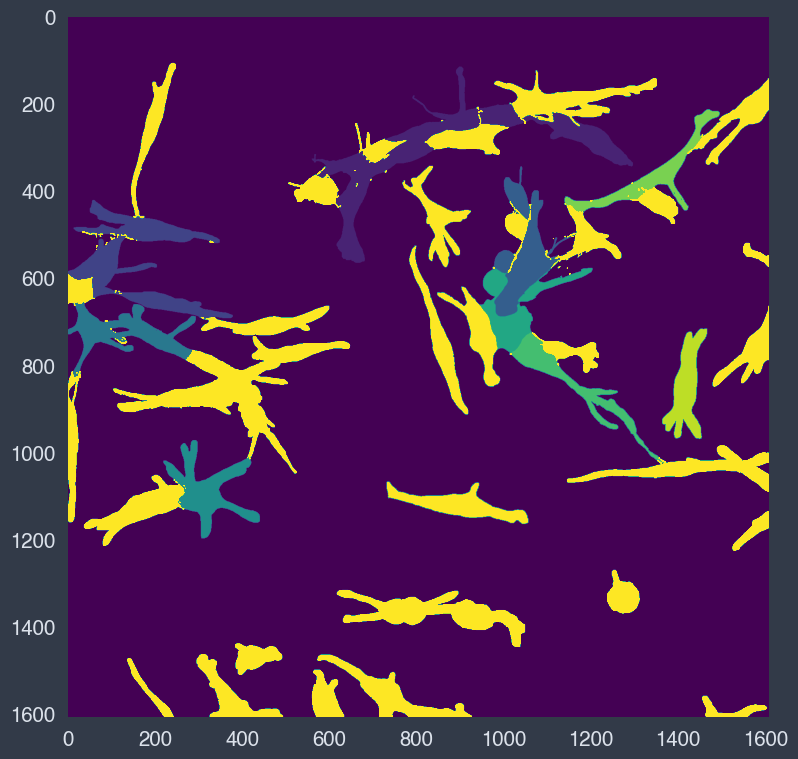

In [7]:
cells = psdio.cell_segments(Layers)
plt.imshow(cells,vmax=10)


In [28]:
out_path = "../annotations/contaminants/raw_layerpercell/V1/"
psd_path = "../annotations/contaminants/raw/"
psd_paths = sorted(glob(psd_path+"*.psd"))

for ind in range(len(psd_paths))[-3:]: 
    Layers = psdio.psd_layesrs_to_npy(psd_paths[ind])
    cells  = psdio.cell_segments(Layers)

    psdio.save_as_psd(out_path+psd_paths[ind].split("/")[-1],Layers[0,:,:,0],Layers[3],cells)

  0%|          | 0/7 [00:00<?, ?it/s]

0 PixelLayer('Background' size=1608x1608)


 29%|██▊       | 2/7 [00:00<00:02,  2.45it/s]

1 Curves('Curves 1' mask)
2 ShapeLayer('bkg' size=1640x1633)


 43%|████▎     | 3/7 [00:01<00:02,  1.63it/s]

3 PixelLayer('conta' size=1588x1561)


 57%|█████▋    | 4/7 [00:02<00:01,  1.72it/s]

4 PixelLayer('cells' size=1608x1608)


 71%|███████▏  | 5/7 [00:02<00:01,  1.79it/s]

5 PixelLayer('cslls2' size=1584x1458)


 86%|████████▌ | 6/7 [00:03<00:00,  1.88it/s]

6 PixelLayer('cells3' size=1058x476)


  0%|          | 0/7 [00:00<?, ?it/s]

0 PixelLayer('Background' size=1608x1608)


 29%|██▊       | 2/7 [00:00<00:01,  2.76it/s]

1 Curves('Curves 1' mask)
2 ShapeLayer('bkg' size=1640x1633)


 43%|████▎     | 3/7 [00:01<00:02,  1.71it/s]

3 PixelLayer('conta' size=1591x1580)


 57%|█████▋    | 4/7 [00:02<00:01,  1.84it/s]

4 PixelLayer('cells' size=1608x1500)


 71%|███████▏  | 5/7 [00:02<00:01,  1.90it/s]

5 PixelLayer('cslls2' size=1608x1492)


 86%|████████▌ | 6/7 [00:03<00:00,  1.98it/s]

6 PixelLayer('cells3' size=1516x903)


  0%|          | 0/7 [00:00<?, ?it/s]

0 PixelLayer('Background' size=1080x1080)


 29%|██▊       | 2/7 [00:00<00:01,  4.75it/s]

1 Curves('Curves 1' mask)
2 ShapeLayer('bkg' size=1640x1633)


 43%|████▎     | 3/7 [00:00<00:01,  2.89it/s]

3 PixelLayer('conta' size=1060x1079)


 57%|█████▋    | 4/7 [00:01<00:00,  3.19it/s]

4 PixelLayer('cells' size=1080x1080)


 71%|███████▏  | 5/7 [00:01<00:00,  3.30it/s]

5 PixelLayer('cslls2' size=1080x1080)


 86%|████████▌ | 6/7 [00:01<00:00,  3.42it/s]

6 PixelLayer('cells3' size=917x913)


100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


53